# Finding the most similar neighborhood to the particular location to build a new branch of successful sport center in Berlin

Load the required packages and libraries:

In [246]:
# !conda install -c conda-forge geopy 
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
from scipy.spatial import distance_matrix 
import matplotlib.colors as colors
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import pandas as pd
import numpy as dp
import requests
import matplotlib.pyplot as plt
#!conda install -c conda-forge folium=0.5.0
import folium # map rendering library

Load the data se from geonames.org to the pandas DataFrame:

In [247]:
url = 'https://www.geonames.org/postalcode-search.html?q=&country=DE&adminCode1=BE'
df = pd.read_html(url, header=0)[2]
df

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Admin4
0,1.0,Berlin,10117,Germany,Berlin,NaN,"Berlin, Stadt",Berlin
1,NaN,52.517/13.387,52.517/13.387,52.517/13.387,52.517/13.387,52.517/13.387,52.517/13.387,52.517/13.387
2,2.0,Berlin,10115,Germany,Berlin,NaN,"Berlin, Stadt",Berlin
3,NaN,52.532/13.385,52.532/13.385,52.532/13.385,52.532/13.385,52.532/13.385,52.532/13.385,52.532/13.385
4,3.0,Berlin,10119,Germany,Berlin,NaN,"Berlin, Stadt",Berlin
...,...,...,...,...,...,...,...,...
386,194.0,Berlin,14131,Germany,Berlin,NaN,"Berlin, Stadt",Berlin
387,NaN,52.517/13.4,52.517/13.4,52.517/13.4,52.517/13.4,52.517/13.4,52.517/13.4,52.517/13.4
388,195.0,Reinickendorf,13047,Germany,Berlin,NaN,"Berlin, Stadt",Berlin
389,NaN,52.567/13.333,52.567/13.333,52.567/13.333,52.567/13.333,52.567/13.333,52.567/13.333,52.567/13.333


Clean the data set:

In [248]:
berlin_df = pd.DataFrame()
temp = df.iloc[:-2:2, :]
berlin_df["Postal Code"] = temp["Code"]
berlin_df.reset_index(drop = True, inplace = True)
berlin_df.head()

,Postal Code
0,10117
1,10115
2,10119
3,10178
4,10179


In [249]:
temp = df.iloc[1::2, :]
temp = pd.DataFrame(temp['Place'])
new_temp = temp["Place"].str.split("/", n = 1, expand = True) 
new_temp.reset_index(drop = True, inplace = True)
berlin_df["Latitude"]= new_temp[0] 
berlin_df["Longitude"]= new_temp[1] 
berlin_df.columns = ['PostalCode', 'Latitude', 'Longitude']

berlin_df.drop_duplicates(subset ="PostalCode", keep = False, inplace = True) 
berlin_df.head()


,PostalCode,Latitude,Longitude
0,10117,52.517,13.387
1,10115,52.532,13.385
2,10119,52.53,13.405
3,10178,52.521,13.41
4,10179,52.512,13.416


In [250]:
berlin_df.dtypes

PostalCode    object
Latitude      object
Longitude     object
dtype: object

Remove the duplicated Prtal codes from data set and print the shape of final data set:

In [251]:
berlin_df.drop_duplicates(subset ="PostalCode", keep = False, inplace = True) 
berlin_df.shape

(195, 3)

In [252]:
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


Plot the location of corresponding postal codes on the map of berlin.  

In [253]:
map_Berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(berlin_df['Latitude'], berlin_df['Longitude'], berlin_df['PostalCode']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius = 5,
        popup = label,
        color = 'yellow',
        fill = True,
        fill_color = 'yello',
        fill_opacity = 0.5,
        parse_html = False).add_to(map_Berlin)  
    
map_Berlin

The next step is to ask from Foursqaure about the venues in each postal code location:

In [285]:
CLIENT_ID = 'CLIENT_ID'
CLIENT_SECRET = 'CLIENT_SECRET'
VERSION = '20180605'

First we will look to the venues near to the Charlottenburg which is the location of SCC: 

In [264]:
index = berlin_df.index[berlin_df['PostalCode'] == "14055"]
berlin_df.iloc[index]

neighborhood_latitude = float(berlin_df.loc[index, 'Latitude'] )
neighborhood_longitude = float(berlin_df.loc[index, 'Longitude'])
berlin_df.iloc[index]

,PostalCode,Latitude,Longitude
167,14055,52.502,13.245


In [265]:
radius = 500
LIMIT = 30
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec2b7623907e7001b077b8b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4c30a75e213c2d7f73c0325d-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/mountain_',
          'suffix': '.png'},
         'id': '4eb1d4d54b900d56c88a45fc',
         'name': 'Mountain',
         'pluralName': 'Mountains',
         'primary': True,
         'shortName': 'Mountain'}],
       'id': '4c30a75e213c2d7f73c0325d',
       'location': {'address': 'Teufelsseechaussee',
        'cc': 'DE',
        'city': 'Berlin',
        'country': 'Deutschland',
        'crossStreet': 'im Forst Grunewald',
        'distance': 334,
        'formattedAddress': ['Teufelsseechaussee (im Forst Grunewald)',
         '14193 Berlin',
         'Deutschland'],
   

In [266]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

nearby_venues includes the venues in the radius of 500m, around the postal code of 14055 : 

In [267]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Drachenberg,Mountain,52.502594,13.249834
1,Kletterturm Teufelsberg,Rock Climbing Spot,52.499728,13.245146
2,Parkplatz Drachenfliegerweg,Rest Area,52.501568,13.250645


This function gets the all 30 venues in each postal code area, with their categories:

In [268]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        lat = float(lat)
        lng = float(lng)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 
                  'PostalCode Latitude', 
                  'PostalCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [269]:
berlin_venues = getNearbyVenues(names = berlin_df['PostalCode'],
                                   latitudes = berlin_df['Latitude'],
                                   longitudes = berlin_df['Longitude'])

10117
10115
10119
10178
10179
10243
10245
10247
10405
10435
10437
10587
10623
10707
10719
10785
10787
10961
10963
10969
10997
10999
11011
12489
12623
13127
13353
14195
10249
10315
10317
10318
10319
10365
10367
10369
10407
10409
10439
10551
10553
10555
10557
10559
10585
10589
10625
10627
10629
10709
10711
10713
10715
10717
10777
10779
10781
10783
10789
10823
10825
10827
10829
10965
10967
12043
12045
12047
12049
12051
12053
12055
12057
12059
12099
12101
12103
12105
12107
12109
12157
12159
12161
12163
12165
12167
12169
12203
12205
12207
12209
12247
12249
12277
12305
12307
12309
12347
12349
12351
12353
12355
12357
12359
12435
12437
12439
12459
12487
12524
12526
12527
12555
12557
12559
12587
12589
12619
12621
12627
12679
12681
12683
12685
13051
13053
13055
13086
13088
13089
13125
13156
13158
13187
13189
13347
13349
13351
13355
13357
13359
13403
13405
13407
13409
13435
13437
13439
13465
13467
13469
13503
13507
13509
13581
13585
13587
13591
13593
13595
13597
13599
13627
13629
14050
14052
1405

In [270]:
print(berlin_venues.shape)
berlin_venues.head()

(2739, 7)


,PostalCode,PostalCode Latitude,PostalCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,10117,52.517,13.387,Dussmann das KulturKaufhaus,52.518343,13.388965,Bookstore
1,10117,52.517,13.387,Dussmann English Bookshop,52.518223,13.389239,Bookstore
2,10117,52.517,13.387,Cookies Cream,52.516569,13.388008,Vegetarian / Vegan Restaurant
3,10117,52.517,13.387,Windhorst,52.518553,13.386270,Cocktail Bar
4,10117,52.517,13.387,Komische Oper,52.515968,13.386701,Opera House


In [271]:
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")
berlin_onehot['PostalCode'] = berlin_venues['PostalCode'] 

fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,PostalCode,Adult Boutique,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Volleyball Court,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,10117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
berlin_grouped = berlin_onehot.groupby('PostalCode').mean().reset_index()
berlin_grouped

,PostalCode,Adult Boutique,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Volleyball Court,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,10115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,10117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0
2,10119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,10178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,10179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,14193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
183,14195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
184,14197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0
185,14199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Check to see if there is a fetuare which has value of zero for all the postal codes:

In [273]:
total_sum = berlin_grouped.sum(axis = 0, skipna = True)
total_sum[total_sum == 0.0]

Series([], dtype: float64)

In [274]:
berlin_grouped.shape

(187, 324)

In [275]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [276]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = berlin_grouped['PostalCode']


for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Coffee Shop,Hotel,Café,Trattoria/Osteria,Organic Grocery,Schnitzel Restaurant,Beer Bar,Science Museum,Gym / Fitness Center,Roof Deck
1,10117,Wine Bar,Gourmet Shop,Cosmetics Shop,Bookstore,Clothing Store,Exhibit,Italian Restaurant,Salad Place,Sandwich Place,Gym
2,10119,Italian Restaurant,Bakery,Ice Cream Shop,Café,Park,Salon / Barbershop,Beer Bar,Beer Garden,Thai Restaurant,Chocolate Shop
3,10178,Coffee Shop,Clothing Store,Hotel,Vietnamese Restaurant,Tour Provider,Historic Site,Science Museum,Optical Shop,Men's Store,Restaurant
4,10179,Nightclub,Bakery,Hotel,History Museum,Beer Garden,Russian Restaurant,Bar,Tourist Information Center,Supermarket,Event Space


In [277]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        sse.append(kmeans.inertia_) 
    return sse

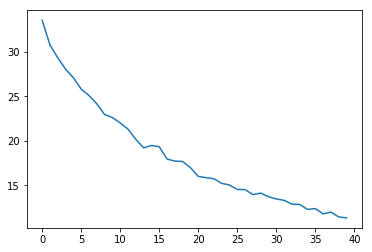

In [278]:
berlin_grouped_clustering = berlin_grouped.drop('PostalCode', 1)
kCluster = 40
scores = calculate_WSS(berlin_grouped_clustering, kCluster)
plt.plot(np.arange(kCluster), scores)

In [279]:
kclusters = 20
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)
kmeans.labels_

array([ 5,  5,  5,  5,  6, 16,  0,  0,  6, 16, 17,  5, 16, 10, 16, 16,  5,
       16, 16,  0,  0,  0,  0,  5,  5,  1,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  5,  5,  5,  5,  5,  0,  0,  6,  6,  6,  5,  5,  5,
        5,  5,  0,  5,  0,  0,  5,  0,  6,  0,  0,  0,  0,  0,  0,  0, 16,
        0, 16,  5,  0, 17, 16, 17,  0,  0, 16,  5,  5, 16, 17, 16,  1, 16,
       16,  5, 17, 17,  3, 17, 16, 16, 17, 19,  5,  0,  4, 16, 12,  1,  1,
       16, 16,  5, 16, 18,  5,  6, 10,  9,  1, 14,  7, 16, 16,  5, 10,  4,
       10, 16, 16,  1, 16,  4, 16,  5, 16, 16,  0,  1, 16, 10,  1,  5, 16,
       11,  0, 17,  0,  0,  0,  5,  5,  5,  5,  4,  5, 14,  3,  6, 16,  5,
       16, 12,  4,  4,  8, 14, 17, 16,  1, 17, 17, 16, 12, 19, 17, 16, 12,
        5, 12, 12,  0,  6,  1, 13,  6,  0,  6,  2,  1, 15, 12,  1,  5, 12],
      dtype=int32)

In [280]:
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

berlin_merged = berlin_df
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on='PostalCode')
berlin_merged.dropna(subset=['ClusterLabels'], inplace = True)
berlin_merged.reset_index(drop = True, inplace = True)
berlin_merged

,PostalCode,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10117,52.517,13.387,5.0,Wine Bar,Gourmet Shop,Cosmetics Shop,Bookstore,Clothing Store,Exhibit,Italian Restaurant,Salad Place,Sandwich Place,Gym
1,10115,52.532,13.385,5.0,Coffee Shop,Hotel,Café,Trattoria/Osteria,Organic Grocery,Schnitzel Restaurant,Beer Bar,Science Museum,Gym / Fitness Center,Roof Deck
2,10119,52.53,13.405,5.0,Italian Restaurant,Bakery,Ice Cream Shop,Café,Park,Salon / Barbershop,Beer Bar,Beer Garden,Thai Restaurant,Chocolate Shop
3,10178,52.521,13.41,5.0,Coffee Shop,Clothing Store,Hotel,Vietnamese Restaurant,Tour Provider,Historic Site,Science Museum,Optical Shop,Men's Store,Restaurant
4,10179,52.512,13.416,6.0,Nightclub,Bakery,Hotel,History Museum,Beer Garden,Russian Restaurant,Bar,Tourist Information Center,Supermarket,Event Space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,13583,52.544,13.182,16.0,Bar,Italian Restaurant,Bakery,Supermarket,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
183,15537,52.4,13.717,12.0,IT Services,Shopping Mall,Miscellaneous Shop,Business Service,Big Box Store,Locksmith,Pet Store,Film Studio,Farm,Farmers Market
184,13159,52.623,13.398,11.0,Clothing Store,Zoo Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish Market
185,14131,52.517,13.4,6.0,History Museum,Hotel,Theater,Museum,Plaza,Art Gallery,Art Museum,Roof Deck,Bookstore,Outdoor Sculpture


In [281]:
index = berlin_merged.index[berlin_merged['PostalCode'] == '14055']
berlin_merged.iloc[index]

,PostalCode,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
162,14055,52.502,13.245,12.0,Mountain,Rest Area,Rock Climbing Spot,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio


In [333]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['PostalCode'], berlin_merged['ClusterLabels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [284]:
berlin_grouped.insert(0, 'ClusterLabels', kmeans.labels_)
index = berlin_grouped.index[berlin_grouped['ClusterLabels'] == 12]
selected_group = berlin_grouped.iloc[index]
selected_group.reset_index(drop = True, inplace = True)
selected_group

,ClusterLabels,PostalCode,Adult Boutique,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Volleyball Court,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,12,12359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,13469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,13597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,14050,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,14053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12,14055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12,14195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12,15537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
selected_PostalCodes = selected_group['PostalCode']
new_df = []
for item in selected_PostalCodes:
    index = berlin_df.index[berlin_df['PostalCode'] == item]
    temp = berlin_df.iloc[index]
    new_df.append(temp)
new_df = pd.concat(new_df)
new_df

,PostalCode,Latitude,Longitude
103,12359,52.447,13.453
150,13469,52.612,13.342
160,13597,52.527,13.219
164,14050,52.521,13.268
166,14053,52.516,13.239
167,14055,52.502,13.245
27,14195,52.459,13.283
191,15537,52.4,13.717


In [332]:
map_Berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(new_df['Latitude'], new_df['Longitude'], new_df['PostalCode']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius = 5,
        popup = label,
        color = 'yellow',
        fill = True,
        fill_color = 'yello',
        fill_opacity = 0.5,
        parse_html = False).add_to(map_Berlin)  
    
map_Berlin